In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
import pickle
#sklearn

In [82]:
# from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import RidgeCV

In [83]:
import warnings
warnings.filterwarnings('ignore')

In [158]:
spotify_data = pd.read_csv("calhacksdata2clean.csv")

In [157]:
text_spotify = pd.read_csv("datawsent.csv")

In [85]:
#datacleaning

In [86]:
def prep_data(frame):
    frame_data = frame.drop_duplicates(subset='title', keep = 'first')
    frame_data = frame_data.drop(['year', 'added', 'live', 'pop'], axis = 1)
#     zero_bpm = frame_data[frame_data["bpm"] == 0].index[0]
#     frame_data = frame_data.drop([zero_bpm])
    frame_data["dur"] = frame_data["dur"].astype("float")
    return frame_data
spotify_data2 = prep_data(spotify_data)

In [ ]:
def gen_mood(x):
    weights = np.array([10, 10, 1, 0.1, 50, 1])
    features = x.loc[['bpm','nrgy' , 'dnce', 'dB', 'val', 'acous']]
    return sum(features * weights) / (x.loc["dur"])



In [119]:
def normalize(col):
    col_range = max(col) - min(col)
    avg = np.mean(col)
    return (col - avg)/col_range


def prep_features(tbl):
    tbl_norm = tbl
    tbl_norm["bpm"] = normalize(tbl_norm["bpm"])
    tbl_norm["dnce"] = normalize(tbl_norm["dnce"])
    tbl_norm["dnce"] = normalize(tbl_norm["dnce"])
    tbl_norm["val"] = normalize(tbl_norm["val"])
    tbl_norm["acous"] = normalize(tbl_norm["acous"])

    tbl_norm["dur"] = tbl_norm["dur"]/100
    return tbl_norm

In [121]:
spotify_data2 = prep_features(text_spotify)

In [88]:
spotify_data2 = prep_features(spotify_data2)

In [122]:
spotify_data2

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,Magnitude,Sentiment
0,0,This Is Me,Keala Settle,broadway,2017,0.466102,70,-0.296062,-7,4,-0.373723,0.0235,-0.466366,19,83,6.1,-0.1
1,1,Rewrite The Stars,Zac Efron,hollywood,2017,0.044719,62,0.138720,-7,12,-0.184249,0.0217,-0.406366,4,82,5.4,-0.2
2,2,Never Enough,Loren Allred,deep talent show,2017,-0.194275,39,-0.296062,-9,10,-0.236881,0.0208,-0.056366,3,81,3.7,-0.2
3,3,A Million Dreams,Ziv Zaifman,hollywood,2017,-0.395533,31,-0.306932,-12,9,-0.373723,0.0269,-0.236366,6,81,4.4,0.1
4,4,The Greatest Show,Hugh Jackman,hollywood,2017,0.252266,82,-0.143889,-7,7,-0.057933,0.0302,-0.476366,11,81,13.3,0.4
5,5,The Other Side,Hugh Jackman,hollywood,2017,0.227109,80,0.095242,-8,15,-0.152670,0.0214,-0.476366,30,79,6.8,0.0
6,6,From Now On,Hugh Jackman,hollywood,2017,-0.062199,52,-0.035193,-10,59,-0.394776,0.0350,-0.476366,4,78,10.4,0.2
7,7,Come Alive,Hugh Jackman,hollywood,2017,0.000694,77,0.160459,-9,21,-0.226354,0.0226,-0.466366,13,78,12.4,0.2
8,8,A Million Dreams (Reprise),Austyn Johnson,hollywood,2017,-0.276036,14,-0.328671,-17,27,-0.373723,0.0060,0.253634,4,75,0.6,0.3
9,9,Never Enough (Reprise),Loren Allred,deep talent show,2017,-0.225721,5,-0.187367,-19,8,-0.342144,0.0080,0.413634,3,74,0.1,-0.1


In [159]:
train, test = train_test_split(spotify_data2)

In [160]:
test.to_csv("test_set.csv")

In [125]:
#running logistic regression to create general moods
#replace with kmeans classifier or other

In [126]:
# min_val = train["val"].sort_values().iloc[0]
# max_val = train["val"].sort_values(ascending=False).iloc[0]
# val_range = max_val - min_val
# bins = val_range/5
# moods = np.arange(min_val, max_val, bins)

# def mood_convert(mood):
#     if mood < moods[0]:
#         return 0
#     if moods[0] <= mood < moods[1]:
#         return 1
#     if moods[1] <= mood < moods[2]:
#         return 2
#     if moods[2] <= mood < moods[3]:
#         return 3
#     if mood >= moods[3]:
#         return 4

# train["mood"] = train["val"].apply(lambda x: mood_convert(x))
# test["mood"] = test["val"].apply(lambda x: mood_convert(x))

# mod = LogisticRegressionCV()
# dropped = train.drop(['title', 'mood'], axis = 1)
# mod.fit(dropped, train["mood"])

In [127]:
# print(mod.score(train.iloc[:, 1:9], train["mood"]))
# print(mod.fit(dropped, train["mood"]))

In [128]:
# result = mod.predict(test.iloc[:, 1:9])
# test["predicted"] = result

In [129]:
#feature development
#Goal: create a continuous variable for mood

In [130]:
def norm_table(tbl):
    tbl_norm = tbl
#     tbl_norm["bpm"] = normalize(tbl_norm["bpm"])
#     tbl_norm["dnce"] = normalize(tbl_norm["dnce"])
#     tbl_norm["dnce"] = normalize(tbl_norm["dnce"])
#     tbl_norm["val"] = normalize(tbl_norm["val"])
#     tbl_norm["acous"] = normalize(tbl_norm["acous"])

#     tbl_norm["dur"] = tbl_norm["dur"]/100
    
    tbl_norm["mood_score"] = tbl_norm.apply(gen_mood, axis = 1)
    tbl_norm["mood_score"] = normalize(tbl_norm["mood_score"])
    in_1_range = 0
    if (v == 0):
        in_1_range = 1 /(np.std(tbl_norm["mood_score"]) * 3)
    else:
        in_1_range = 1 /(np.std(train_norm["mood_score"]) * 3)
    tbl_norm["mood_score"] = tbl_norm["mood_score"] * in_1_range
    return tbl_norm

In [131]:
v = 0
train_norm = norm_table(train)
v = 1
test_norm = test

In [134]:
def find_songs(tbl, score, epsilon):
    in_range = tbl[(score - epsilon < tbl["mood_score"]) &(score + epsilon > tbl["mood_score"])]
    in_range["dists"] = abs(in_range["mood_score"] - score)
    sort_by_dist = in_range.sort_values("dists")
    return sort_by_dist

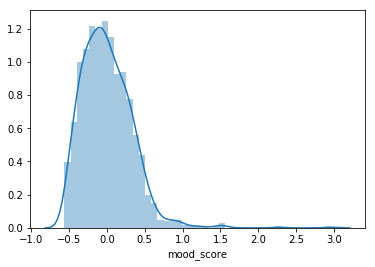

In [135]:
sns.distplot(train_norm["mood_score"])

In [136]:
find_songs(train_norm, 0.2, 0.05)

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,Magnitude,Sentiment,mood_score,dists
937,4792,Moon Shot,The Underachievers,hip hop,2015,0.139058,90,0.095242,-6,17,0.015751,0.0260,-0.406366,34,33,8.4,-0.3,0.199409,0.000591
49,49,Almost There,Anika Noni Rose,hollywood,2009,-0.244589,50,-0.046062,-6,28,0.057856,0.0144,0.333634,5,64,3.8,0.3,0.200836,0.000836
228,244,What You Own,Anthony Rapp,broadway,1999,0.095033,80,0.008285,-7,34,0.352593,0.0236,-0.216366,4,26,1.6,0.0,0.199049,0.000951
1339,4382,Mermelada De Clarinete,Porte√±a Jazz Band,NaN,2006,-0.074778,59,0.193068,-12,67,0.531540,0.0177,0.453634,24,2,0.0,0.0,0.201466,0.001466
424,1158,The Sweetheart Tree,Henry Mancini,adult standards,2000,0.013272,40,-0.263454,-14,55,-0.015828,0.0115,0.383634,3,18,0.9,0.4,0.198350,0.001650
201,216,Out Tonight,Daphne Rubin-Vega,broadway,1999,0.120191,78,0.182198,-6,9,0.342067,0.0229,-0.456366,5,31,0.0,0.0,0.202755,0.002755
573,1327,Feels,Calvin Harris,edm,2017,-0.106225,75,0.366981,-3,9,0.436803,0.0223,-0.416366,6,71,6.6,0.2,0.196960,0.003040
790,2679,Mercy Mercy Me (The Ecology),Marvin Gaye,classic soul,2013,-0.156539,68,-0.046062,-9,9,0.110488,0.0196,-0.216366,5,10,3.2,-0.6,0.203057,0.003057
533,1285,Sugar,Maroon 5,pop,2015,0.013272,79,0.214807,-7,9,0.447330,0.0235,-0.416366,3,79,5.8,0.0,0.196700,0.003300
557,1310,Roar,Katy Perry,dance pop,2013,0.390631,77,-0.002584,-5,35,0.005224,0.0224,-0.476366,4,76,3.3,0.0,0.196304,0.003696


In [102]:
find_songs(train_norm, -0.1, 0.5)

,title,artist,top genre,bpm,nrgy,dnce,dB,val,dur,acous,spch,mood_score,dists
1399,Exhale - Shoop Shoop,Whitney Houston,dance pop,0.114356,43,0.122377,-8,-0.373135,2.02,0.007553,3,-0.099619,0.000381
7201,Count On Me,Bruno Mars,pop,-0.162480,40,0.035420,-6,0.068970,1.97,0.417553,3,-0.099563,0.000437
4322,Take That Look Off Your Face from Tell Me On A...,The New York Theatre Orchestra - The Broadway ...,NaN,-0.072085,37,0.046290,-12,-0.004714,1.81,0.277553,3,-0.100576,0.000576
4328,Thrift Shop (Instrumental Version),Instrumental Mafia,NaN,-0.128582,49,0.383246,-7,-0.246819,2.33,-0.412447,11,-0.099061,0.000939
9318,You and I,Ingrid Michaelson,acoustic pop,0.091757,30,0.165855,-8,0.068970,1.49,0.497553,6,-0.098974,0.001026
9564,Ghost Of You And Me,BBMak,boy band,-0.100333,59,0.057159,-7,-0.025766,2.89,0.147553,2,-0.101031,0.001031
4517,m.A.A.d city,Kendrick Lamar,conscious hip hop,-0.151181,73,-0.062406,-7,-0.236293,3.50,-0.372447,27,-0.098438,0.001562
248,This Can't Be Love,Judy Kuhn,hollywood,0.069158,20,0.144116,-15,0.100549,1.00,0.107553,14,-0.098374,0.001626
4590,Tity and Dolla (feat. Hugh Augustine & Jay Rock),Isaiah Rashad,hip hop,0.035260,60,0.187594,-9,0.100549,2.98,-0.102447,32,-0.101681,0.001681
7244,Amnesia,5 Seconds of Summer,boy band,-0.089034,50,0.024550,-5,-0.352082,2.37,-0.392447,3,-0.101833,0.001833


In [103]:
lm = RidgeCV()

In [104]:
lm.fit(train_norm.loc[:, ["bpm", "nrgy", "dnce", "dB", "val", "dur", "acous"]], train_norm["mood_score"])

RidgeCV(alphas=(0.1, 1.0, 10.0), cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)

In [105]:
test_norm["mood_predicted"] = lm.predict(test_norm.loc[:, ["bpm", "nrgy", "dnce", "dB", "val", "dur", "acous"]])

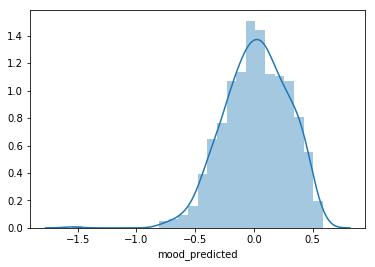

In [106]:
sns.distplot(test_norm["mood_predicted"])

In [147]:
train_norm["mood_score"] = train_norm["mood_score"] * 0.7 + train_norm["Sentiment"] * 0.3

In [148]:
def predict_songs(tbl):
    tbl_predicted = tbl
    predicted = lm.predict(tbl.loc[:, ["bpm", "nrgy", "dnce", "dB", "val", "dur", "acous"]])
    tbl_predicted["mood_predicted"] = predicted
    return tbl_predicted
test_norm = predict_songs(test_norm)

In [149]:
predict_songs(train_norm)

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,Magnitude,Sentiment,mood_score,mood_predicted
1471,4201,Dreamgirls,Amber Riley,NaN,2017,0.214530,84,-0.176497,-5,70,0.321014,0.0196,0.093634,20,29,0.0,0.0,0.191952,0.722858
401,1125,Wasn't Born To Follow,Carole King,adult standards,1968,-0.250879,41,-0.089541,-12,7,-0.036881,0.0224,0.193634,2,30,0.9,-0.1,-0.174401,0.261750
1195,4649,Bye Bye Baby,Noname,escape room,2016,-0.219432,38,-0.035193,-13,11,0.047330,0.0169,0.363634,45,53,2.0,0.2,0.170976,0.262419
659,1436,Footloose,Kenny Loggins,album rock,1984,0.352895,91,0.030025,-6,6,0.205224,0.0227,-0.376366,7,72,1.5,-0.1,0.059799,0.740190
785,2657,Let The Good Times Roll,Quincy Jones,disco,1995,-0.068489,71,0.030025,-6,39,0.310488,0.0176,-0.126366,15,46,4.5,0.0,0.164884,0.580153
1577,4097,dream #1 [arrival],charlie dreaming,NaN,2018,-0.320061,11,-0.328671,-24,10,-0.384249,0.0258,0.403634,4,59,0.0,0.0,-0.227354,-0.051270
901,3328,Concierto De Aranjuez,Jim Hall,bebop,1974,0.082455,20,-0.035193,-18,11,-0.142144,0.1154,0.463634,3,52,0.0,0.0,-0.244333,0.050519
313,1009,I Got It Bad And That Ain't Good,Oscar Peterson Trio,adult standards,1997,-0.420690,6,-0.035193,-27,9,-0.289512,0.0306,0.493634,5,66,0.4,-0.4,-0.648373,-0.066793
251,268,The Music Of The Night,Andrew Lloyd Webber,broadway,2018,0.315159,27,-0.426497,-10,13,-0.331618,0.0312,0.183634,3,24,3.9,0.3,0.123219,0.050391
1209,4664,Start,Frank Ocean,hip hop,2012,-0.238300,25,-0.306932,-20,51,-0.436881,0.0046,0.253634,16,52,0.8,-0.8,-0.557474,0.061999


In [150]:
def find_predicted_songs(tbl, score, num_songs):
    in_range = tbl
    
    in_range["dists"] = abs(in_range["mood_predicted"] - score)
    sort_by_dist = in_range.sort_values("dists")
    
    return sort_by_dist[:num_songs]

In [152]:
find_predicted_songs(test_norm, -0.6000000238418579, 25)

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,Magnitude,Sentiment,mood_predicted,dists
1613,4134,Phenomena,Primer Dia,NaN,2018,0.113901,4,-0.437367,-24,9,-0.447407,0.0166,0.483634,4,48,0.0,0.0,-0.133067,0.466933
701,1620,Interlude No. 3,Keith Jarrett,bebop,1971,-0.062199,0,-0.046062,-25,11,-0.205302,0.0078,0.513634,20,55,0.0,0.0,-0.121007,0.478993
1604,4125,Position Position (Here),Rannar Sillard,NaN,2014,0.095033,8,-0.404758,-17,11,-0.436881,0.0101,0.393634,5,53,0.0,0.0,-0.116433,0.483567
888,3283,An Old Peasant Like Me,Explosions In The Sky,compositional ambient,2013,-0.143960,7,-0.415628,-20,11,-0.447407,0.0227,0.453634,4,51,0.1,0.1,-0.113128,0.486872
1546,4065,Can't Help Falling in Love,Haley Reinhart,NaN,2016,0.126480,5,-0.154758,-14,11,-0.215828,0.0173,0.473634,4,75,1.9,0.4,-0.112441,0.487559
696,1612,I Hear A Rhapsody,Bill Evans,bebop,1962,0.346606,4,-0.187367,-26,13,-0.352670,0.0280,0.523634,4,57,0.3,0.3,-0.111130,0.488870
899,3326,What Is There To Say,Chico Hamilton,bebop,2011,-0.099935,2,-0.056932,-32,12,-0.384249,0.0173,0.513634,4,53,2.5,0.8,-0.109902,0.490098
833,3226,Turncoat,Goldmund,ambient,2015,-0.232011,6,-0.383019,-23,4,-0.436881,0.0207,0.483634,3,59,0.0,0.0,-0.108439,0.491561
860,3253,Requiem On Frankfort Ave,Eluvium,ambient,2007,-0.382954,7,-0.480845,-20,11,-0.436881,0.0161,0.473634,5,54,0.0,0.0,-0.105875,0.494125
691,1600,God Bless the Child,Sonny Rollins,bebop,2005,-0.093646,7,-0.078671,-17,8,-0.331618,0.0445,0.443634,3,60,1.8,0.4,-0.104174,0.495826


In [153]:
#control for epsilon with respet to std, to control # of songs that show up

In [154]:
#update weights with user input

In [155]:
#discrete classification to test generality of algorithm to see ballpark range
#linear regression for more nuanced moods

In [156]:
with open('lm.pickle', 'wb') as f:
    pickle.dump(lm, f)


In [115]:
with open('lm.pickle', 'rb') as fi:
    loaded_obj = pickle.load(fi)

In [116]:
loaded_obj.predict(test.loc[:, ["bpm", "nrgy", "dnce", "dB", "val", "dur", "acous"]])

array([ 1.60476082e-01, -3.60013013e-01, -1.95807181e-01,  2.15580006e-01,
        3.96632434e-01,  7.97389530e-02,  4.01821886e-02,  1.49466751e-01,
       -3.08569628e-01, -1.69930151e-01,  2.03710016e-01,  2.62417198e-01,
        3.80244937e-01, -1.85266783e-01, -1.18320696e-01,  8.90875023e-02,
        2.15013557e-01, -5.48542973e-02, -2.00209059e-01,  2.15760070e-01,
       -3.42885212e-01,  4.73808173e-01, -3.38369600e-01, -5.74186047e-01,
        3.92555919e-01, -4.74311208e-02,  6.45459753e-02,  5.21250963e-01,
        1.65614035e-03,  6.03930055e-02, -2.71148436e-01, -1.51093079e-01,
        4.38263410e-01,  1.94210756e-01, -1.76599028e-01,  2.54404295e-01,
        7.40650372e-02, -2.80680265e-01, -1.34744616e-01, -3.25617561e-02,
       -5.00859723e-02, -2.71453785e-02, -4.56427398e-01,  4.86708992e-01,
        5.31351653e-01, -5.07055813e-02,  2.65636485e-03, -1.87764630e-02,
       -1.84264539e-01,  2.31889942e-01,  4.25807772e-01, -9.98402076e-02,
       -5.28148325e-01, -

In [ ]:
test.sort_values(by='bpm')

In [ ]:
clf2 = pickle.loads(s)
clf2.predict(X[0:1])